In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Define function 

First we define a function we will then sample and make a machine learning model learn from the data points.

In [3]:
def ref_function(x):
    return 3*np.sin(x*np.pi*4)

# Create the space of X's
x = np.linspace(0, 1, 100)

We plot the sinewave we created

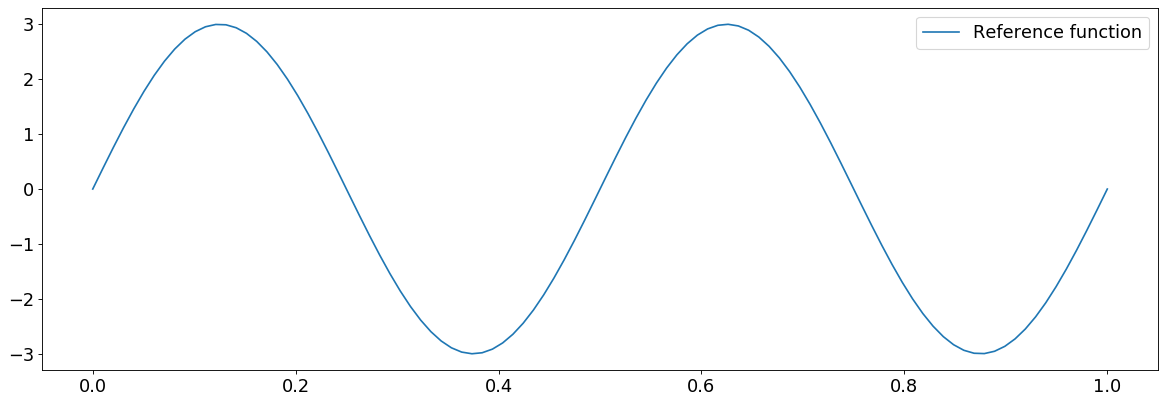

In [4]:
plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x, ref_function(x), label="Reference function")
plt.legend(loc="upper right")
plt.show()

## Sampling

We need to create the dataset for the model to learn from. We will take random samples from the previous functions and add some noise

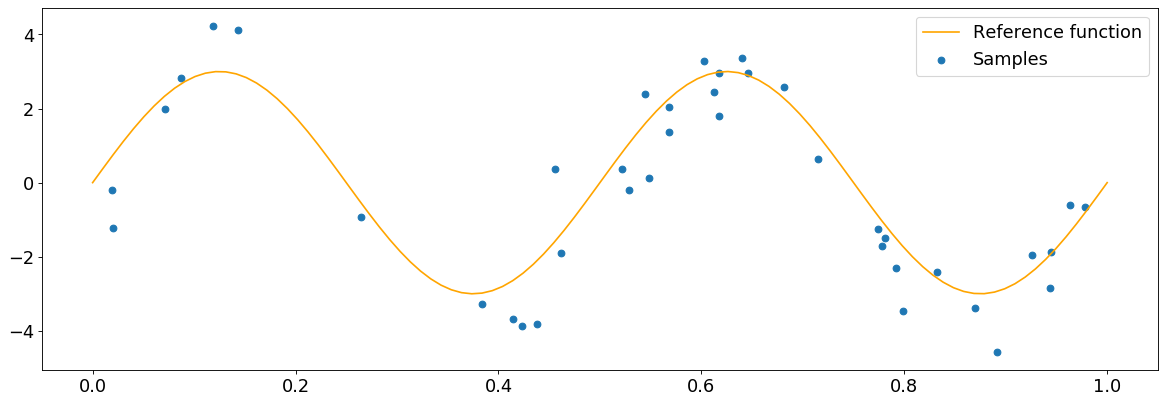

In [5]:
np.random.seed(0) # We want the samples to be the same everytime
n_samples = 40

x_sampling = np.sort(np.random.rand(n_samples))
y = ref_function(x_sampling) + np.random.randn(n_samples) # Samples + noise

plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x, ref_function(x), color='orange', label="Reference function")
plt.scatter(x_sampling, y, label="Samples")
plt.legend(loc="upper right")
plt.show()

## Linear

First we will create a linear model with polynomial features using sklearn.

We will try polynomial models of different order to see how they behave.

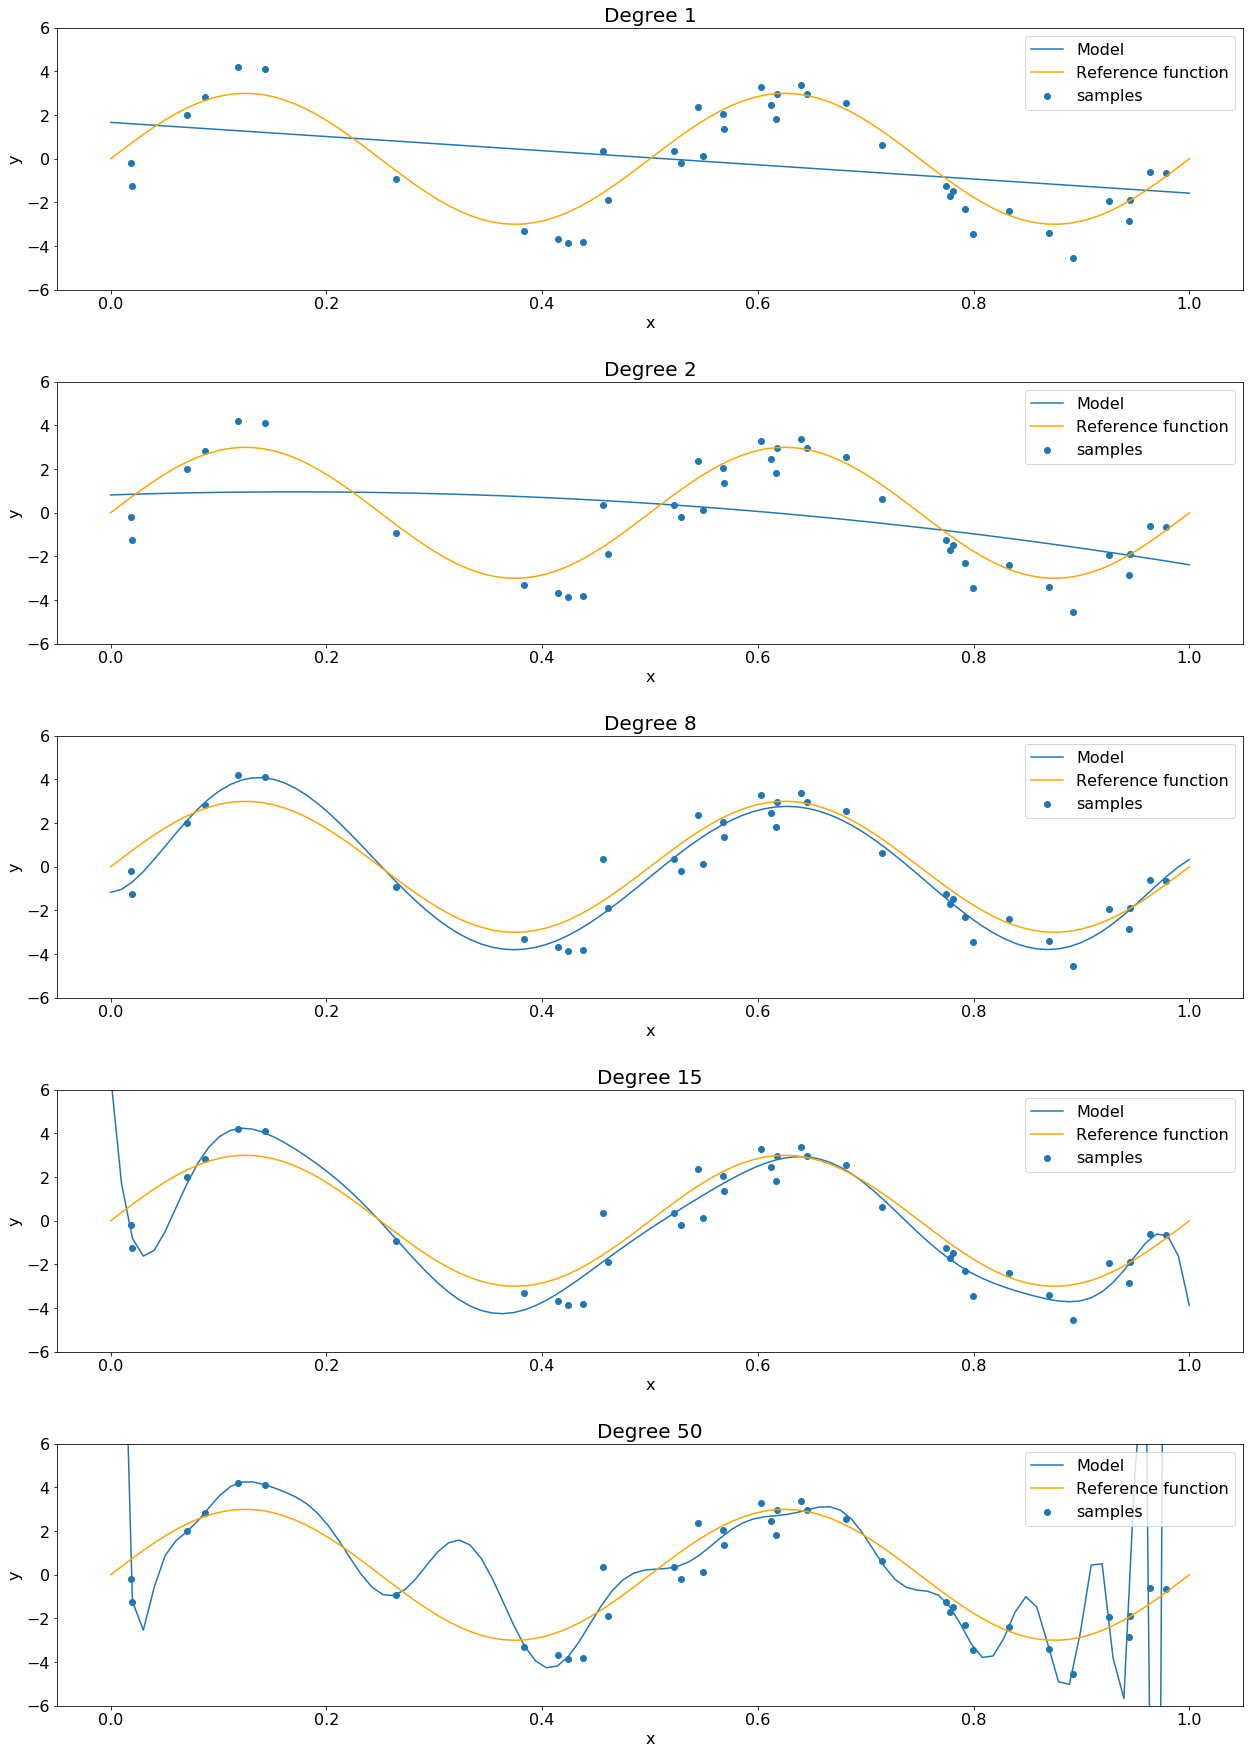

In [6]:
degrees = [1, 2, 8, 15, 50]


plt.figure(figsize=(18, 25))


for i in range(len(degrees)):
    ax = plt.subplot(len(degrees), 1, i + 1)

    polynomial_features = PolynomialFeatures(degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    model.fit(x_sampling[:, np.newaxis], y)
   
   
    plt.plot(x, model.predict(x[:, np.newaxis]), label="Model")
    plt.plot(x, ref_function(x), color='orange', label="Reference function")
    plt.scatter(x_sampling, y, label="samples")
    plt.ylim((-6,6))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="upper right")
    plt.title("Degree {}".format(degrees[i]))
    plt.tight_layout(pad=3.0)
    
    # Print the coefficients of each model
    #print(model.steps[1][1].coef_)
plt.show()

Note that there is a clear tendency to **overfit** to the data points if the order of the polynomial model is too large. <br>
There are different ways to solve this problem:
- Make the model simpler by reducing the number of features (reducing the order)
- Get more data
- Use regularization

## Lasso

First we will try to see how Lasso regularization performs.

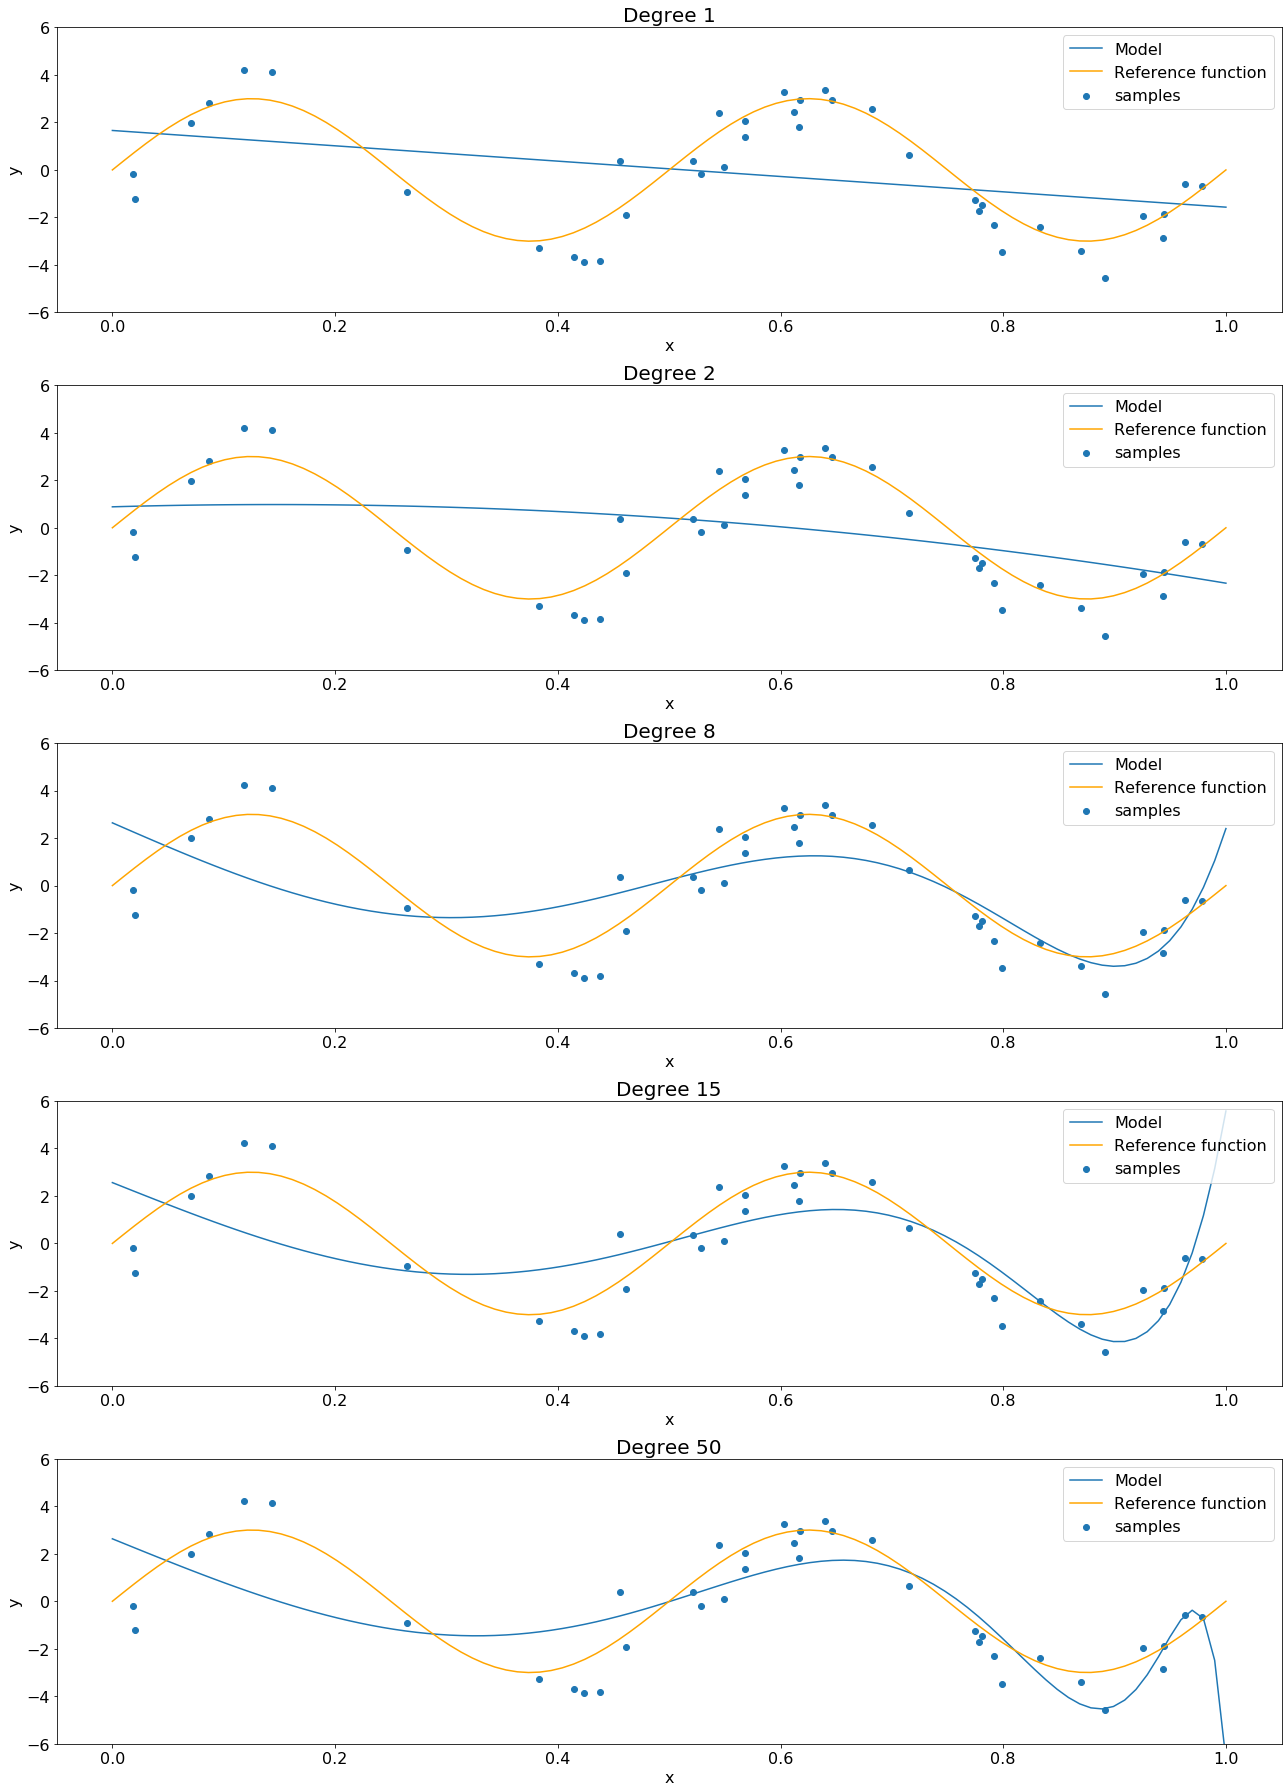

In [7]:
plt.figure(figsize=(18, 25))


for i in range(len(degrees)):
    ax = plt.subplot(len(degrees), 1, i + 1)

    polynomial_features = PolynomialFeatures(degrees[i], include_bias=False)
    lasso_regression = Lasso(alpha=0.001, max_iter=1000000)
    model = Pipeline([("polynomial_features", polynomial_features),
                         ("lasso_regression", lasso_regression)])

    model.fit(x_sampling[:, np.newaxis], y)    
   
    plt.plot(x, model.predict(x[:, np.newaxis]), label="Model")
    plt.plot(x, ref_function(x), color='orange', label="Reference function")
    plt.scatter(x_sampling, y, label="samples")
    plt.ylim((-6,6))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="upper right")
    plt.title("Degree {}".format(degrees[i]))
    plt.tight_layout()
plt.show()

As it can be seen in the figure above, regularization is useful when **overfitting**.

When we set the polynomial degree to 8 without regularization it is correctly fitting the data. But when using regularization is **underfitting**.

We were overfitting the data when the degree was around 50. Now, it looks like is doing a better job.

**Note:** This example is only academic. The data points ara not equally distributed and this makes the model perform better in the second wave because there is more data.

## Ridge

Similarly to Lasso regression, we try Ridge regularization

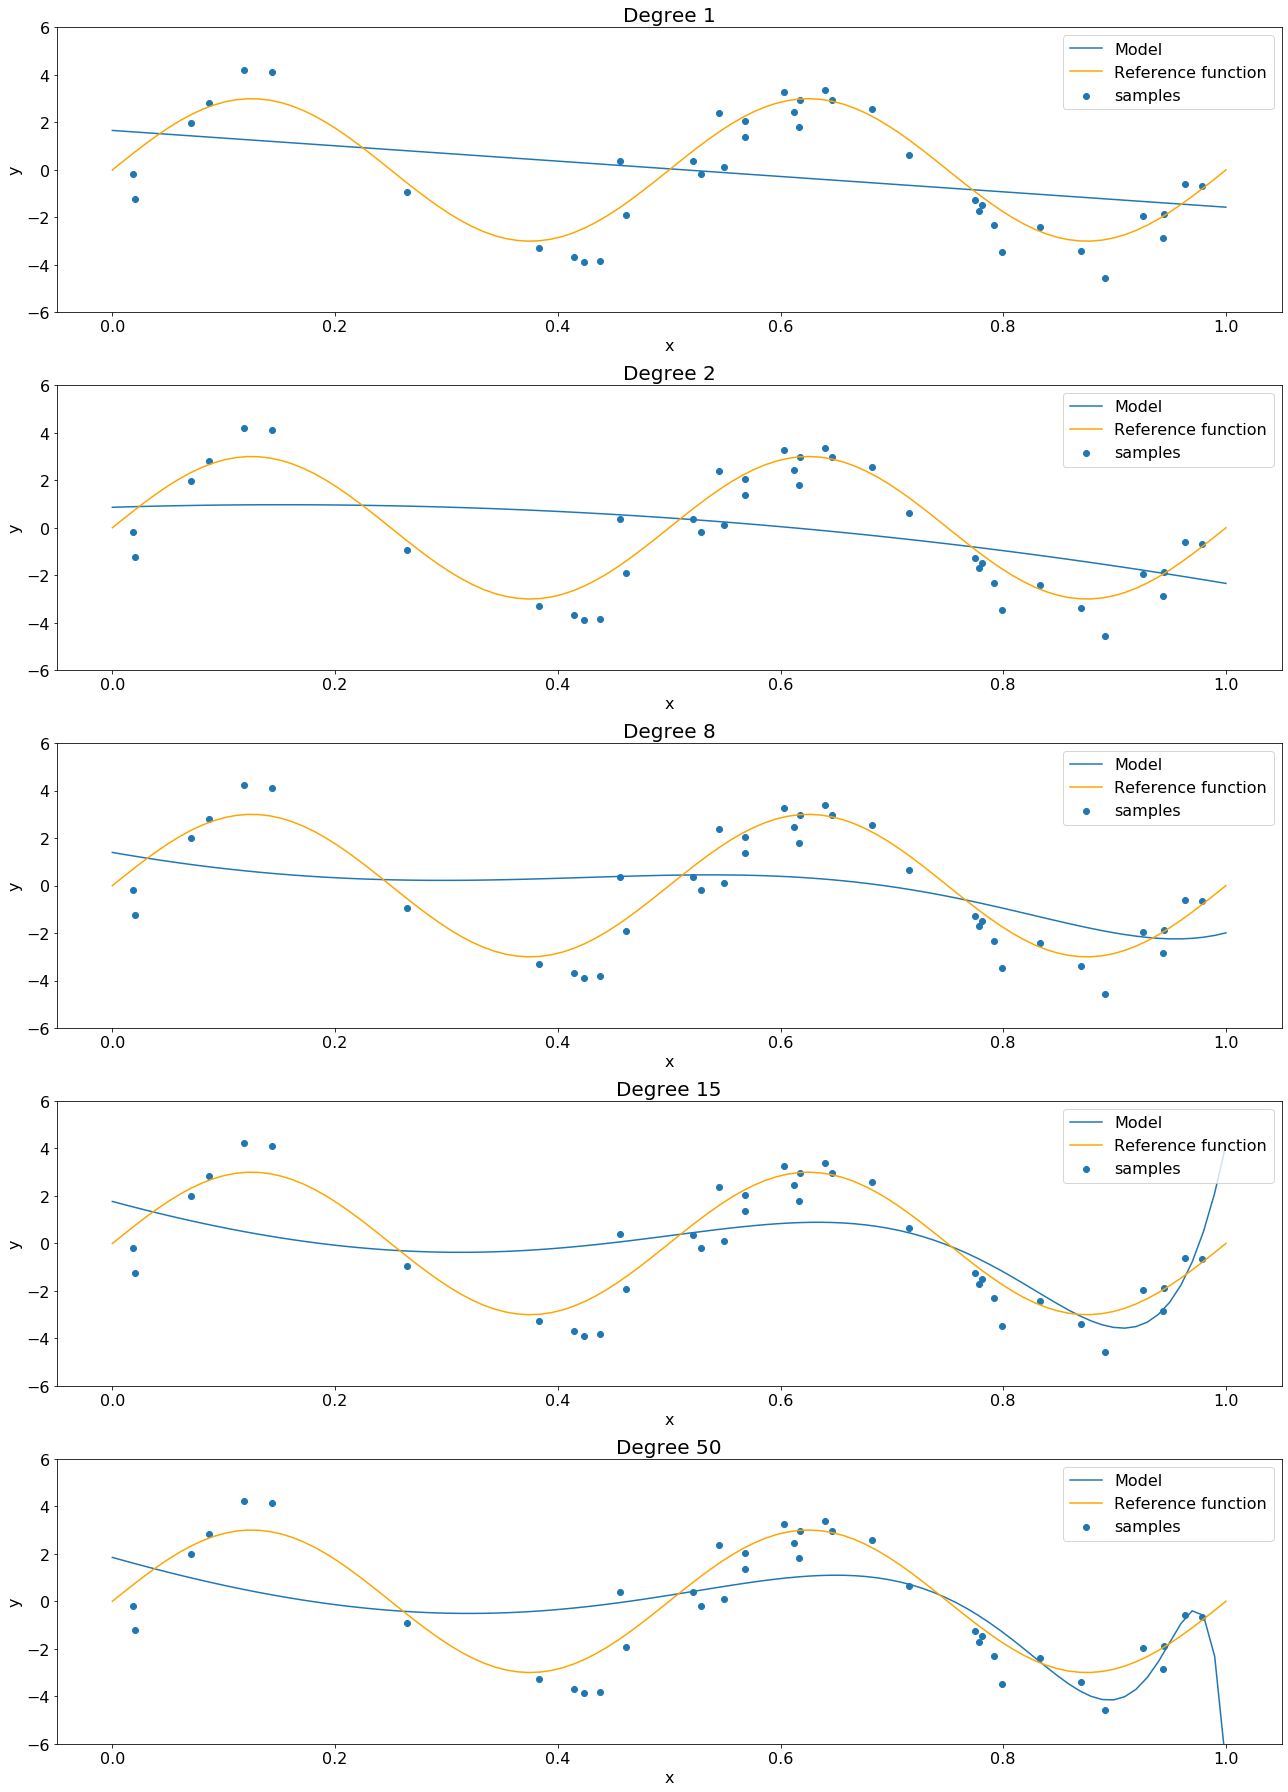

In [8]:
plt.figure(figsize=(18, 25))


for i in range(len(degrees)):
    ax = plt.subplot(len(degrees), 1, i + 1)

    polynomial_features = PolynomialFeatures(degrees[i], include_bias=False)
    ridge_regression = Ridge(alpha=0.01, max_iter=100000)
    model = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge_regression", ridge_regression)])

    model.fit(x_sampling[:, np.newaxis], y)    
   
    plt.plot(x, model.predict(x[:, np.newaxis]), label="Model")
    plt.plot(x, ref_function(x), color='orange', label="Reference function")
    plt.scatter(x_sampling, y, label="samples")
    plt.ylim((-6,6))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="upper right")
    plt.title("Degree {}".format(degrees[i]))
    plt.tight_layout()
plt.show()